# Modeling Deep Ocean pH as a Function of Atmospheric CO2

## Import Libraries

In [26]:
#Pandas and Numpy are imported as well as modules from Matplotlib and Scikit-learn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Import the Dataset

In [27]:
#the data set is imported and empty rows are dropped 
ocean_atmo_data = pd.read_csv("co2_ocean_ph.csv")
ocean_atmo_data = ocean_atmo_data.dropna(how = "all")
#ocean_atmo_data.head(30)

## Split Data into Matrix of Features and Dependent Variable 

In [28]:
#The data is split into independent and dependent variables 
#This particular data set contains only two variables. However, the following syntax would slice any size
#data set into a matrix of independent features and a single dependent variable at the end
x = ocean_atmo_data.iloc[:,:-1].values
y = ocean_atmo_data.iloc[:,-1].values


## Split Data into Training and Test Sets 

In [29]:
#The train_test_split function is used to split both x and y into training and test sets 
# 80% of both x and y will be separated into training data while 20 percent is set aside for testing 
# random_state is set to zero for reproducible results 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

## Create and Train the Simple Linear Regression Model 


In [35]:
# a LinearRegression object is instantiated and then training using the training data: x_train and y_train
simple_regressor = LinearRegression()
simple_regressor.fit(x_train,y_train)

LinearRegression()

## Make Simple Predictions and Comparisons

In [47]:
#Here predictions about the dependent variable (y) are made based on the independent training variable
#being fed to the trained model. The predicted values are then compared to the actual values in terms of percent closeness
# 'percent_accuracy_train' is a Pandas series containing the percent accuracy of each predicted value compared to the actual value
pH_prediction_train = simple_regressor.predict(x_train)

prediction_train_accuracy = []
for i in range(len(y_train)):
    prediction_train_accuracy.append(min(pH_prediction_train[i],y_train[i])/max(pH_prediction_train[i],y_train[i]) * 100)

#The describe method is used to determine the mean accuracy across the entire universe of predictions 
#We can see that, on average, predicted values differed from actual values by only (approximately) 0.21 percent
#This also accompanies a fairly small standard deviation 
percent_accuracy_train = pd.Series(prediction_train_accuracy)
percent_accuracy_train.describe()



count    360.000000
mean      99.790172
std        0.151617
min       99.229972
25%       99.696347
50%       99.814213
75%       99.911370
max       99.999808
dtype: float64

In [50]:
#The same method is performed here using the test data
#This is data the model was not exposed to during its training

pH_prediction_test = simple_regressor.predict(x_test)

prediction_test_accuracy = []
for i in range(len(x_test)):
    prediction_test_accuracy.append(min(pH_prediction_test[i],y_test[i])/max(pH_prediction_test[i],y_test[i]) * 100)

percent_accuracy_test = pd.Series(prediction_test_accuracy)
percent_accuracy_test.describe()

count    90.000000
mean     99.787369
std       0.175495
min      99.153440
25%      99.701506
50%      99.851760
75%      99.909381
max      99.995437
dtype: float64

## Visualize the Results

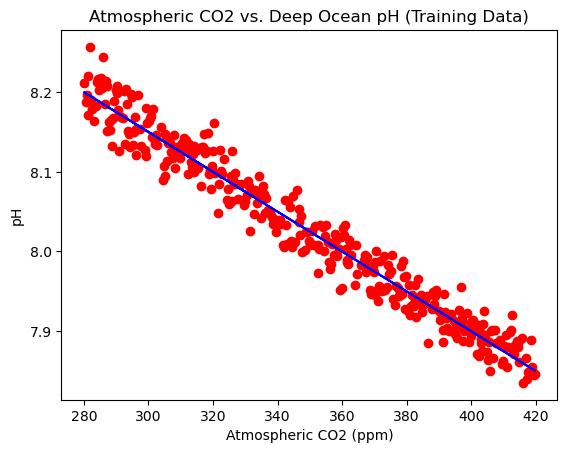

In [56]:
#Here, the actual data points in the training data (red) are compared to
#predicted values of pH as a function of training values for CO2 (blue)
#This is done with training data to develop an idea of how the model has been trained to fit the actual data 
#The training data does not show signs of overfit and exhibits normality around the model

plt.figure()
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, pH_prediction_train, color = "blue")
plt.title("Atmospheric CO2 vs. Deep Ocean pH (Training Data)")
plt.xlabel("Atmospheric CO2 (ppm)")
plt.ylabel("pH")
plt.show()

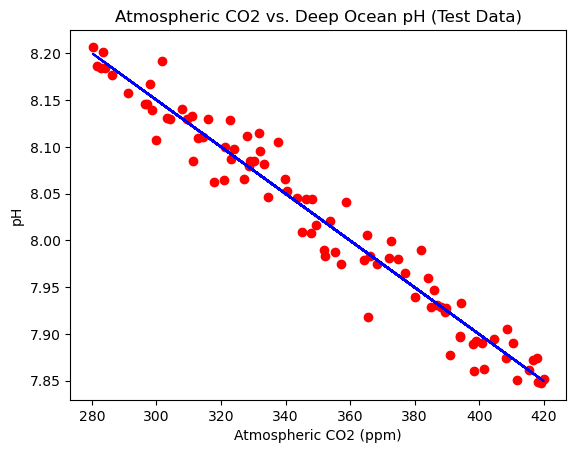

In [57]:
# The same visualization technique is used with the test data.
#predicted values (blue) are compared to actual values (red)

plt.figure()
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, pH_prediction_test, color = "blue")
plt.title("Atmospheric CO2 vs. Deep Ocean pH (Test Data)")
plt.xlabel("Atmospheric CO2 (ppm)")
plt.ylabel("pH")
plt.show()

## Find the Equation for the Model

In [60]:
#Here the linear equation for the model is formated in an f-string by extracting its one coefficient and its y-intercept 

coefficients = simple_regressor.coef_
intercept = simple_regressor.intercept_
model_equation = f"Equation: y = {coefficients[0]}x + {intercept}"
model_equation

'Equation: y = -0.0025034086863160144x + 8.901083086304395'

## Predicting a Single pH Value

In [67]:
#an independent variable value of 650 ppm is entered into the model
#The model predicts that ocean pH will decrease to approximately 7.27 at an atmospheric CO2 of 650 ppm

ppm650 = [[650]]

pH_for_650ppm = f"According to this model, the predicted deep ocean pH, given an atmospheric CO2 of 650 ppm, would be approximately {round(simple_regressor.predict(ppm650)[0],2)}"
print(pH_for_650ppm)

According to this model, the predicted deep ocean pH, given an atmospheric CO2 of 650 ppm, would be approximately 7.27
